In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import seaborn as sns

In [2]:
def fitness(x):
    # Model fitness as a weighted combination of metrics
    w = [0.0, 0.0, 0.1, 0.9]  # weights for [P, R, mAP@0.5, mAP@0.5:0.95]
    return (x[:, :4] * w).sum(1)

def hist2d(x, y, n=100):
    # 2d histogram used in labels.png and evolve.png
    xedges, yedges = np.linspace(x.min(), x.max(), n), np.linspace(y.min(), y.max(), n)
    hist, xedges, yedges = np.histogram2d(x, y, (xedges, yedges))
    xidx = np.clip(np.digitize(x, xedges) - 1, 0, hist.shape[0] - 1)
    yidx = np.clip(np.digitize(y, yedges) - 1, 0, hist.shape[1] - 1)
    return np.log(hist[xidx, yidx])

In [42]:
def plot_evolve(evolve_csv='path/to/evolve.csv'):  # from utils.plots import *; plot_evolve()
    # Plot evolve.csv hyp evolution results
    evolve_csv = Path(evolve_csv)
    data = pd.read_csv(evolve_csv)
    keys = [x.strip() for x in data.columns]
    x = data.values
    f = fitness(x)
    j = np.argmax(f)  # max fitness index
    plt.figure(figsize=(10, 12), tight_layout=True)
    matplotlib.rc('font', **{'size': 8})
    print(f'Best results from row {j} of {evolve_csv}:')
    for i, k in enumerate(keys[7:]):
        v = x[:, 7 + i]
        mu = v[j]  # best single result
        plt.subplot(6, 5, i + 1)
        sns.scatterplot(x=v, y=f, c=hist2d(v, f, 20), cmap='viridis', alpha=.8, edgecolors='none')
        plt.plot(mu, f.max(), 'k+', markersize=15)
        plt.title(f'{k} = {mu:.3g}', fontdict={'size': 9})  # limit to 40 characters
        if i % 5 != 0:
            plt.yticks([])
        print(f'{k:>15}: {mu:.3g}')
    f = evolve_csv.with_suffix('.pdf')  # filename
    plt.savefig(f)
    plt.show()
    plt.close()
    print(f'Saved {f}')

Best results from row 78 of Evolve\BuildEvo2\evolve.csv:
            lr0: 0.0135
            lrf: 0.0103
       momentum: 0.975
   weight_decay: 0.0008
  warmup_epochs: 3.17
warmup_momentum: 0.59
 warmup_bias_lr: 0.0657
            box: 0.0531
            cls: 0.417
         cls_pw: 1.17
            obj: 1.21
         obj_pw: 1.31
          iou_t: 0.2
       anchor_t: 3.61
       fl_gamma: 0
          hsv_h: 0.0163
          hsv_s: 0.607
          hsv_v: 0.424
        degrees: 0
      translate: 0.101
          scale: 0.396
          shear: 0
    perspective: 0
         flipud: 0
         fliplr: 0.5
         mosaic: 1
          mixup: 0
     copy_paste: 0
        anchors: 2.97


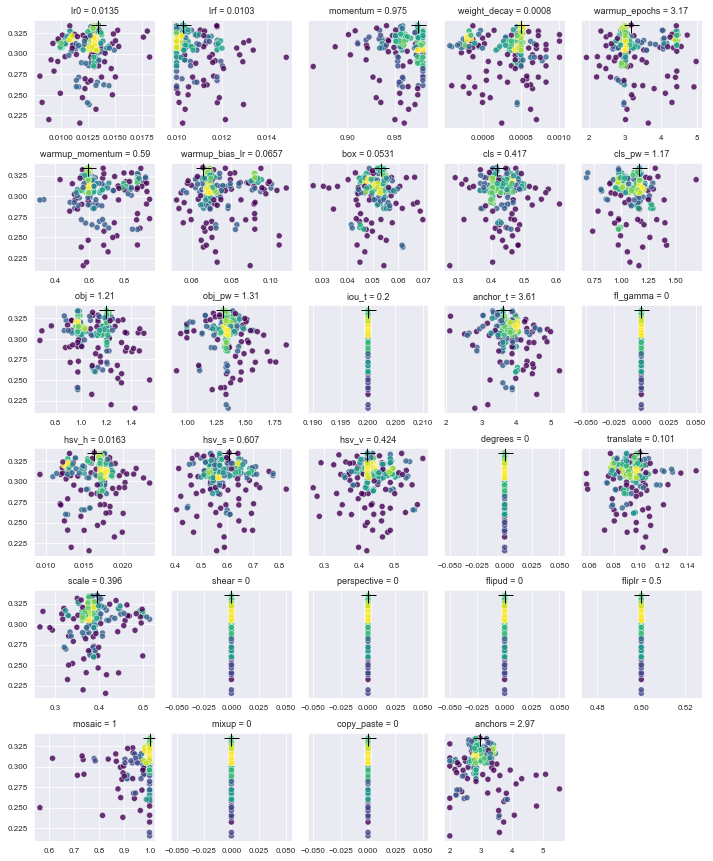

Saved Evolve\BuildEvo2\evolve.pdf


In [43]:
plot_evolve("Evolve/BuildEvo2/evolve.csv")

Best results from row 78 of Evolve\BuildEvo2\evolve.csv:
            cls: 0.417
            obj: 1.21
            box: 0.0531


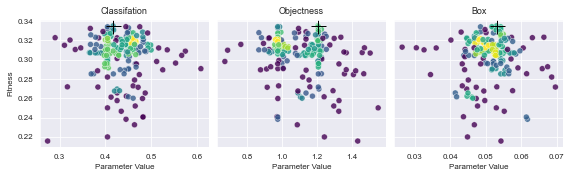

Saved Evolve\BuildEvo2\evolve.pdf


In [41]:
evolve_csv = "Evolve/BuildEvo2/evolve.csv"
evolve_csv = Path(evolve_csv)
data = pd.read_csv(evolve_csv)
keys = [x.strip() for x in data.columns]
x = data.values
f = fitness(x)
j = np.argmax(f)  # max fitness index
fig, ax = plt.subplots(1, 3,sharey= 'row', figsize=(8,2.5))
matplotlib.rc('font', **{'size': 8})
print(f'Best results from row {j} of {evolve_csv}:')
names = ["Classifation", "Objectness", "Box"]
for no, i in enumerate([8,10,7]):
    k = keys[7+i]
    v = x[:, 7 + i]
    mu = v[j]  # best single result
    sns.scatterplot(x=v, y=f, c=hist2d(v, f, 20),ax=ax[no], cmap='viridis', alpha=.8, edgecolors='none')
    ax[no].plot(mu, f.max(), 'k+', markersize=15)
    ax[no].set_title(f'{names[no]}', fontdict={'size': 9})  # limit to 40 characters
    ax[no].set_xlabel("Parameter Value")
  #  plt.yticks([])
    print(f'{k:>15}: {mu:.3g}')
ax[0].set_ylabel("Fitness")
f = evolve_csv.with_suffix('.pdf')  # filename
fig.tight_layout()
plt.savefig(f)
plt.show()
plt.close()
print(f'Saved {f}')